#  **Bank Customer Churn Analysis**

**Problem statement:**

In the rapidly evolving banking sector, customer retention has become a critical concern. Banks are increasingly seeking to understand the factors that influence customer decisions to stay with or leave their banking service provider. This project focuses on analyzing a dataset containing various attributes of bank customers to identify key predictors of customer churn. By leveraging data analytics, we aim to uncover patterns and insights that could help devise strategies to enhance customer retention and reduce churn rates.

## Importing modules and downloading dataset

In [126]:
# importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# downloading dataset
# !gdown 1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W (can find on github page)
data = pd.read_csv('Bank-Records.csv')

## Basic Metrics

In [26]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [27]:
data.shape

(10000, 18)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [29]:
data.duplicated().sum()

0

We can see that there are no null values or duplicates in the dataset.

In [31]:
data.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

## Descriptive Statistics

In [33]:
df = data.copy()

#renaming column values
df['HasCrCard'] = df['HasCrCard'].replace({0: 'No', 1: 'Yes'})
df['IsActiveMember'] = df['IsActiveMember'].replace({0: 'No', 1: 'Yes'})
df['Exited'] = df['Exited'].replace({0: 'No', 1: 'Yes'})
df['Complain'] = df['Complain'].replace({0: 'No', 1: 'Yes'})

#grouping Age column
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60,100], labels=['upto 30', '31 to 40', '41 to 50', '51 to 60', '60+' ])

num_cols = ['CreditScore','Age','Tenure','Balance', 'NumOfProducts', 'EstimatedSalary','Satisfaction Score','Point Earned']
cat_cols = ['Geography','Gender','Age Group', 'HasCrCard', 'IsActiveMember', 'Exited','Complain','Card Type']

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464,41 to 50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456,41 to 50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377,41 to 50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350,31 to 40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425,41 to 50


In [34]:
df[num_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


- **CreditScore** column has a range of 96 - 850 with an average of 650 which is almost equal to the 50 percentile i.e., it may follow normal distribution.
- Customer's **Age** ranges from 18 to 92 with an average of 39.
- Maximum **Tenure** given to a customer is 10 years with an average of 5 years.
- Average Bank **Balance** of the customers is 62K.
- **Number of Products** bought by the customers ranges from 1 to 4.
- Average **Estimated Salary** of the customers is 100K with Highest of 200K.
- Average **Satisfaction Score** given by the customer in a scale of 1 - 5 is 3.
- Average number of **Points earned** by the customers is 606.

In [36]:
df[cat_cols].describe()

,Geography,Gender,Age Group,HasCrCard,IsActiveMember,Exited,Complain,Card Type
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,5,2,2,2,2,4
top,France,Male,31 to 40,Yes,Yes,No,No,DIAMOND
freq,5014,5457,4451,7055,5151,7962,7956,2507


- Most of the customers are from **France**.
- Most of the customers are **Males**.
- Most of the customers belongs to 31 to 40 **Age Group**.
- 7055 customers out of 10000 have **Credit card**.
- 5151 customers are **Active Members**.
- 2038 customers have **excited** from the bank.
- 2044 customers raised **complaints**.
- Most of the customers uses *Diomond* **Credit card type**.

In [38]:
df[num_cols].skew()

CreditScore          -0.071607
Age                   1.011320
Tenure                0.010991
Balance              -0.141109
NumOfProducts         0.745568
EstimatedSalary       0.002085
Satisfaction Score   -0.008936
Point Earned          0.008344
dtype: float64

In [39]:
df[num_cols].kurt()

CreditScore          -0.425726
Age                   1.395347
Tenure               -1.165225
Balance              -1.489412
NumOfProducts         0.582981
EstimatedSalary      -1.181518
Satisfaction Score   -1.285097
Point Earned         -1.193781
dtype: float64

## EDA for Customers Churn

### Customers by Churn Status

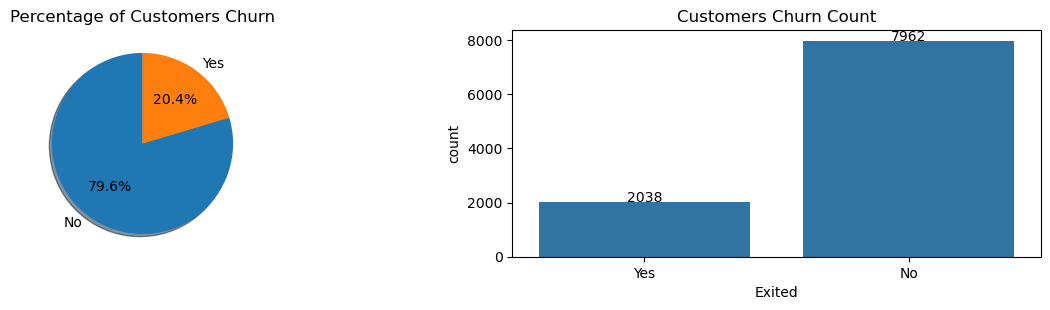

In [42]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
plt.title('Percentage of Customers Churn')
plt.pie(df['Exited'].value_counts(),
        labels = df['Exited'].value_counts().index,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 90)

plt.subplot(3,2,2)
plt.title('Customers Churn Count')
g = sns.countplot(df, x='Exited')
for p in g.patches:
  g.text(x = p.get_x()+p.get_width()/2, y = p.get_height(), ha = 'center', s = round(p.get_height()))

- 2038 members out of 1000 i.e., 20.4% of the total customers got churned.

### Churn Rate of Bank Customers

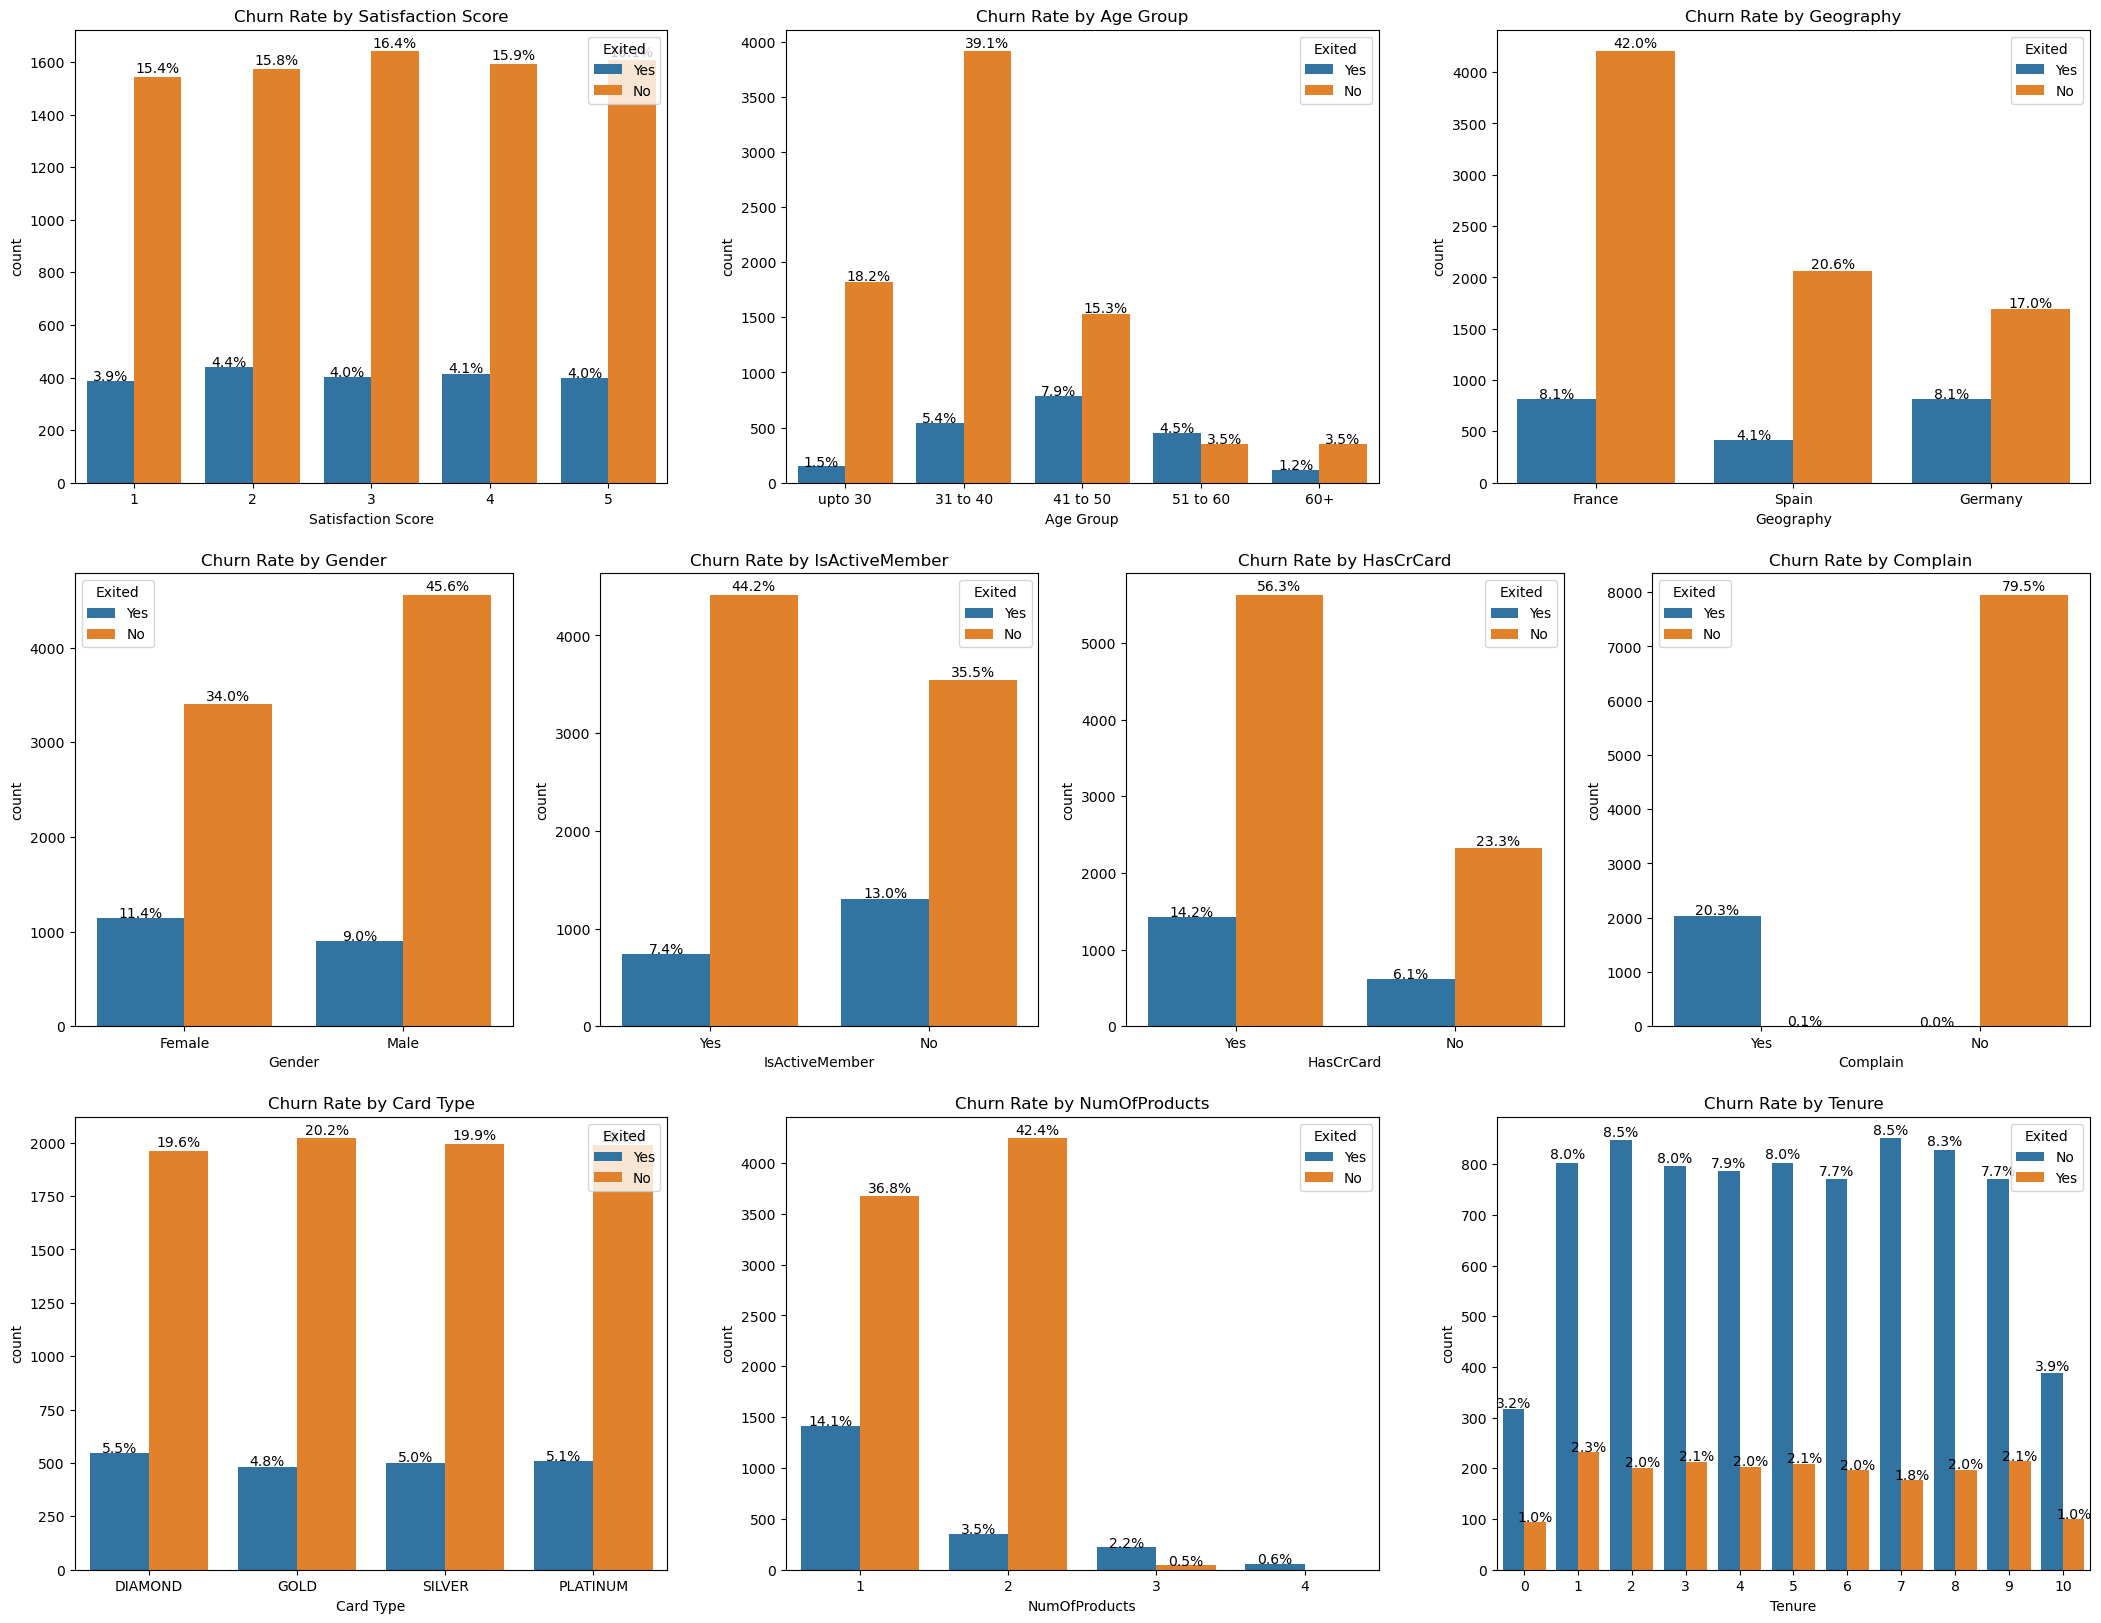

In [45]:
plt.figure(figsize=(26,20))

cols = ['Satisfaction Score', 'Age Group','Geography','Gender','IsActiveMember','HasCrCard','Complain','Card Type', 'NumOfProducts', 'Tenure']

for i in cols:
  if cols.index(i)>2 and cols.index(i)<7 :
    ncol=4
    pos=cols.index(i)+2
  elif cols.index(i)<3 :
    ncol=3
    pos=cols.index(i)+1
  else:
    ncol=3
    pos=cols.index(i)

  plt.subplot(3,ncol,pos)
  plt.title('Churn Rate by '+i)
  g = sns.countplot(df, x=i, hue='Exited')
  for p in g.patches:
    if p.get_height():
      g.text(x = p.get_x()+p.get_width()/2, y = p.get_height()*1.01, ha = 'center', s = str(((p.get_height()/10000)*100).round(1))+'%')

plt.show()

**Gender**
- Female bank customers churn the most with a percentage of 11.4% compared to males who have a percentage of 9%.

**Geography**
- France and Germany have a churn percentage of 8.1% each and Spain with a churn percentage of 4.1%.

**Age Group**
- Bank customers in the 40–50 age group have a higher churn percentage than other age groups at 7.9%. This is followed by the 30–40 age group with a churn percentage of 5.4%, the 50–60 age group with a percentage of 4.5%, the less than 30 age group with a percentage of 1.5%, and the more than 60 age group with a percentage of 1.1%.

**IsActiveMember**
- Bank customers who are not active members have a higher churn percentage than active customers, with a churn percentage of 13%.

**HasCreditCard**
- Bank customers who have a credit card churn the most with a percentage of 14.2% compared to customers who do not have a credit card with a churn percentage of 6.1%.

**Card Type**
- Bank customers with Diamond card type churn more with a percentage of 5.5% than others.

**NumOfProducts**
- Bank customers who purchased 1 product through the bank have a larger churn percentage than other categories with a percentage of 14.1%.

**Satisfaction Score**
-  Each satisfaction score has a relatively balanced Churn rate of around 4%.

**Tenure**
- Each Tenure has a relatively balanced Churn rate ranging from 1-2%.

**Complain**
- All bank customers who churn are customers who also make complaints against the bank.


### Distribution of continuous variables by Churn Status

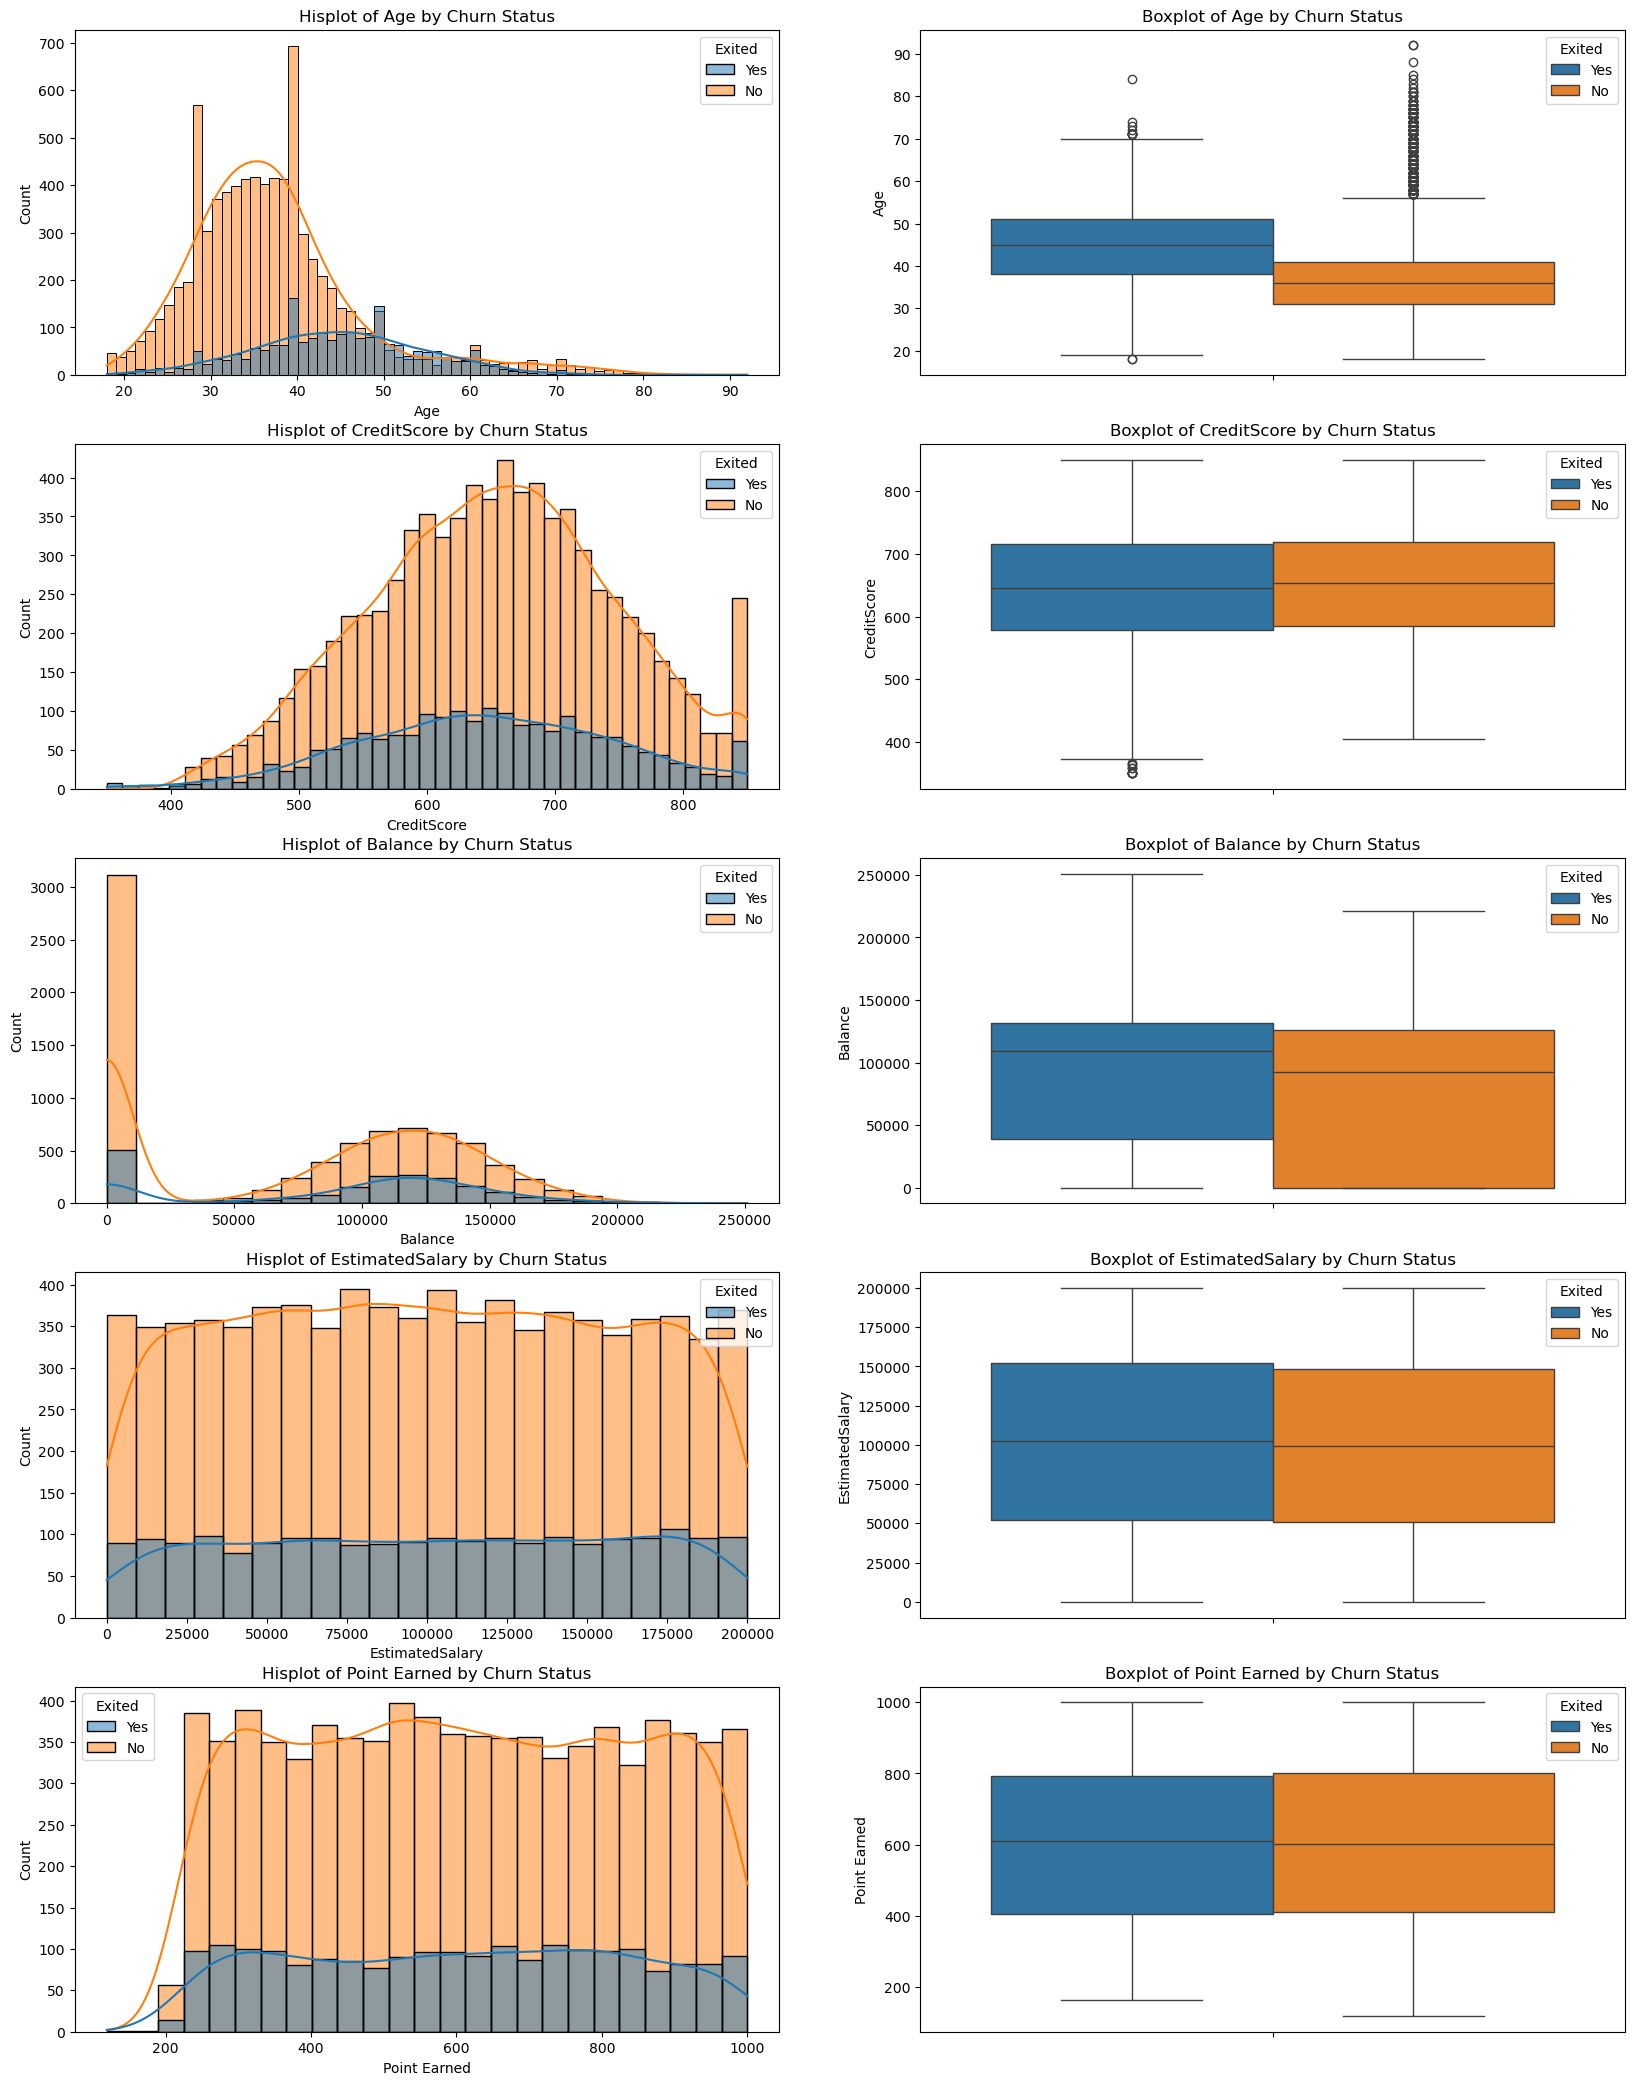

In [48]:
plt.figure(figsize=(20,26))
cols = ['Age','CreditScore','Balance','EstimatedSalary','Point Earned']

for i in cols:

  plt.subplot(5, 2, cols.index(i)*2+1)
  plt.title('Hisplot of '+i+' by Churn Status')
  sns.histplot(data=df, x=i, kde=True, hue='Exited')

  plt.subplot(5, 2, cols.index(i)*2+2)
  plt.title('Boxplot of '+i+' by Churn Status')
  sns.boxplot(df, y=i, hue='Exited')

plt.show()

**Age**
- The age distribution of churned bank customers is more in between the ages of 40 years to 50 years.
- The age distribution of retained bank customers is more in between the ages of 30 years and 40 years.

**CreditScore**
- The credit score distribution of churned and retained customers is similar having more spread between 600 and 700.

**Balance**
- The balance distribution of churn customers spread between 40,000 and 125,000.
- The balance distribution of retain customers spread between 0 and 125,000.

**EstimatedSalary**
- The estimated salary distribution of churned and retained customers is similar having more spread between 50,000 and 150,000.

**Point Earned**
- The Points Earned distribution of churned and retained customers is similar having more spread between 400 and 800.

### Correlation

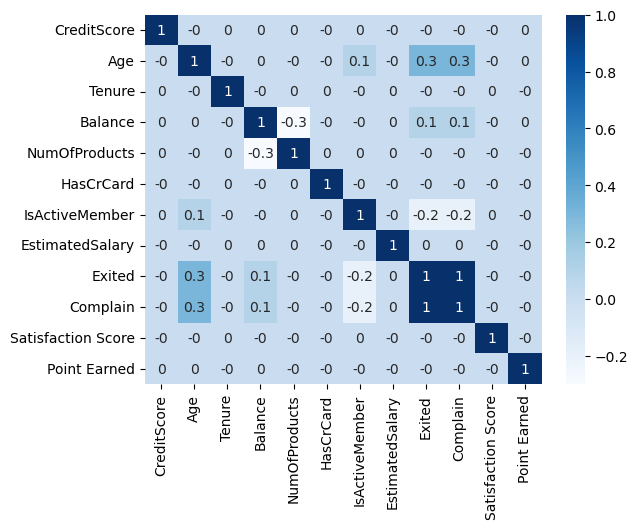

In [51]:
corr_cols = data.corr(numeric_only=True).index
corr_cols = np.delete(corr_cols, np.where((corr_cols == 'RowNumber') | (corr_cols == 'CustomerId')))
corr_df = data[corr_cols].corr().round(1)
sns.heatmap(corr_df, annot=True, cmap='Blues')
plt.show()

- Customer's Churn status has a strong positive correlation of 1 with Complain status.

- Customer's Churn status has a weak negative correlation with Active Members and has a weak positive correlation with Age.

- Bank balance has a very weak positive correlation with Customer's Churn status.

## Hypothesis Testing

### Churn vs Categorical columns

In [55]:
def churn_vs_cat_testing(cat_col):
  h0 = 'Churn rate and '+cat_col+' are independent'
  h1 = 'Churn rate and '+cat_col+' are dependent'
  alpha = 0.05
  observed = pd.crosstab(df['Exited'],df[cat_col])
  chi, p_val, dof, expected = stats.chi2_contingency(observed)
  print('\033[1m'+'Null Hypothesis: '+'\033[0m'+h0)
  print('\033[1m'+'Alternate Hypothesis: '+'\033[0m'+h1+'\n')
  print('\033[1m'+'Contingency Table for Churn vs '+cat_col+':'+'\033[0m'+'\n')
  print(observed)
  print('\n'+'\033[1m'+'chi-statistic: '+'\033[0m'+str(chi))
  print('\033[1m'+'p-value: '+'\033[0m'+str(p_val))
  print('\033[1m'+'alpha: '+'\033[0m'+str(alpha)+'\n')
  if p_val < alpha:
    print('\033[1m'+'Result: '+'\033[0m'+'Reject Null Hypothesis'+'\n')
    print('\033[1m'+ '\033[4m'+'\033[3m'+h1+'\033[0m')
  else:
    print('\033[1m'+'Result: '+'\033[0m'+'Failed to reject Null Hypothesis'+'\n')
    print('\033[1m'+ '\033[4m'+'\033[3m'+h0+'\033[0m')

Since 'Excited' column is a categorical and it is comparing with other categorical columns, it will be categorical vs categorical. So we are using Chi-square testing for these.

A method is defined to perform chi-square testing among columns taking significant level as 0.05.

#### Gender

In [58]:
churn_vs_cat_testing('Gender')

Null Hypothesis: Churn rate and Gender are independent
Alternate Hypothesis: Churn rate and Gender are dependent

Contingency Table for Churn vs Gender:

Gender  Female  Male
Exited              
No        3404  4558
Yes       1139   899

chi-statistic: 112.39655374778587
p-value: 2.9253677618642e-26
alpha: 0.05

Result: Reject Null Hypothesis

Churn rate and Gender are dependent


#### Geography

In [60]:
churn_vs_cat_testing('Geography')

Null Hypothesis: Churn rate and Geography are independent
Alternate Hypothesis: Churn rate and Geography are dependent

Contingency Table for Churn vs Geography:

Geography  France  Germany  Spain
Exited                           
No           4203     1695   2064
Yes           811      814    413

chi-statistic: 300.6264011211942
p-value: 5.245736109572763e-66
alpha: 0.05

Result: Reject Null Hypothesis

Churn rate and Geography are dependent


#### Age group

In [62]:
churn_vs_cat_testing('Age Group')

Null Hypothesis: Churn rate and Age Group are independent
Alternate Hypothesis: Churn rate and Age Group are dependent

Contingency Table for Churn vs Age Group:

Age Group  upto 30  31 to 40  41 to 50  51 to 60  60+
Exited                                               
No            1820      3912      1532       349  349
Yes            148       539       788       448  115

chi-statistic: 1288.2056054490638
p-value: 1.2004274755488362e-277
alpha: 0.05

Result: Reject Null Hypothesis

Churn rate and Age Group are dependent


#### Number Of Products

In [64]:
churn_vs_cat_testing('NumOfProducts')

Null Hypothesis: Churn rate and NumOfProducts are independent
Alternate Hypothesis: Churn rate and NumOfProducts are dependent

Contingency Table for Churn vs NumOfProducts:

NumOfProducts     1     2    3   4
Exited                            
No             3675  4241   46   0
Yes            1409   349  220  60

chi-statistic: 1501.5048306588592
p-value: 0.0
alpha: 0.05

Result: Reject Null Hypothesis

Churn rate and NumOfProducts are dependent


#### Active Status

In [66]:
churn_vs_cat_testing('IsActiveMember')

Null Hypothesis: Churn rate and IsActiveMember are independent
Alternate Hypothesis: Churn rate and IsActiveMember are dependent

Contingency Table for Churn vs IsActiveMember:

IsActiveMember    No   Yes
Exited                    
No              3546  4416
Yes             1303   735

chi-statistic: 243.6948024819593
p-value: 6.1531674381134086e-55
alpha: 0.05

Result: Reject Null Hypothesis

Churn rate and IsActiveMember are dependent


#### Credit Card Status

In [68]:
churn_vs_cat_testing('HasCrCard')

Null Hypothesis: Churn rate and HasCrCard are independent
Alternate Hypothesis: Churn rate and HasCrCard are dependent

Contingency Table for Churn vs HasCrCard:

HasCrCard    No   Yes
Exited               
No         2332  5630
Yes         613  1425

chi-statistic: 0.4494039375253385
p-value: 0.5026181509009862
alpha: 0.05

Result: Failed to reject Null Hypothesis

Churn rate and HasCrCard are independent


#### Complain Status

In [70]:
churn_vs_cat_testing('Complain')

Null Hypothesis: Churn rate and Complain are independent
Alternate Hypothesis: Churn rate and Complain are dependent

Contingency Table for Churn vs Complain:

Complain    No   Yes
Exited              
No        7952    10
Yes          4  2034

chi-statistic: 9907.907035880155
p-value: 0.0
alpha: 0.05

Result: Reject Null Hypothesis

Churn rate and Complain are dependent


#### Card Type

In [72]:
churn_vs_cat_testing('Card Type')

Null Hypothesis: Churn rate and Card Type are independent
Alternate Hypothesis: Churn rate and Card Type are dependent

Contingency Table for Churn vs Card Type:

Card Type  DIAMOND  GOLD  PLATINUM  SILVER
Exited                                    
No            1961  2020      1987    1994
Yes            546   482       508     502

chi-statistic: 5.053223027060927
p-value: 0.16794112067810177
alpha: 0.05

Result: Failed to reject Null Hypothesis

Churn rate and Card Type are independent


#### Satisfaction Score

In [74]:
churn_vs_cat_testing('Satisfaction Score')

Null Hypothesis: Churn rate and Satisfaction Score are independent
Alternate Hypothesis: Churn rate and Satisfaction Score are dependent

Contingency Table for Churn vs Satisfaction Score:

Satisfaction Score     1     2     3     4     5
Exited                                          
No                  1545  1575  1641  1594  1607
Yes                  387   439   401   414   397

chi-statistic: 3.8027035326309573
p-value: 0.4333649732774312
alpha: 0.05

Result: Failed to reject Null Hypothesis

Churn rate and Satisfaction Score are independent


#### Tenure

In [76]:
churn_vs_cat_testing('Tenure')

Null Hypothesis: Churn rate and Tenure are independent
Alternate Hypothesis: Churn rate and Tenure are dependent

Contingency Table for Churn vs Tenure:

Tenure   0    1    2    3    4    5    6    7    8    9    10
Exited                                                       
No      318  803  847  796  786  803  771  851  828  770  389
Yes      95  232  201  213  203  209  196  177  197  214  101

chi-statistic: 14.058258798510963
p-value: 0.17035079254617927
alpha: 0.05

Result: Failed to reject Null Hypothesis

Churn rate and Tenure are independent


### Churn vs Numerical columns

In [78]:
def churn_vs_num_testing(num_col,alternative):
  h0 = 'Average '+num_col+' of churned customers is as same as Average '+num_col+' of retained customers'
  if alternative == 'greater':
    h1 = 'Average '+num_col+' of churned customers is greater than Average '+num_col+' of retained customers'
  elif alternative == 'less':
    h1 = 'Average '+num_col+' of churned customers is less than Average '+num_col+' of retained customers'
  else:
    h1 = 'Average '+num_col+' of churned customers is not as same as to Average '+num_col+' of retained customers'
  alpha = 0.05
  observed = df.groupby('Exited')[num_col].mean()
  t_stat, p_val = stats.ttest_ind(df[df['Exited']=='Yes'][num_col], df[df['Exited']=='No'][num_col], alternative=alternative)
  print('\033[1m'+'Null Hypothesis: '+'\033[0m'+h0)
  print('\033[1m'+'Alternate Hypothesis: '+'\033[0m'+h1+'\n')
  print('\033[1m'+'Average '+num_col+' of Churned and Retained customers:'+'\033[0m'+'\n')
  print(observed)
  print('\n'+'\033[1m'+'t-statistic: '+'\033[0m'+str(t_stat))
  print('\033[1m'+'p-value: '+'\033[0m'+str(p_val))
  print('\033[1m'+'alpha: '+'\033[0m'+str(alpha)+'\n')
  if p_val < alpha:
    print('\033[1m'+'Result: '+'\033[0m'+'Reject Null Hypothesis'+'\n')
    print('\033[1m'+ '\033[4m'+'\033[3m'+h1+'\033[0m')
  else:
    print('\033[1m'+'Result: '+'\033[0m'+'Failed to reject Null Hypothesis'+'\n')
    print('\033[1m'+ '\033[4m'+'\033[3m'+h0+'\033[0m')

Since 'Excited' column is a categorical and it is comparing with other numerical columns, it will be categorical vs numerical. So we are using t-test for independence for these.

A method is defined to perform t-test for independence among columns taking significant level as 0.05.

#### Age

In [81]:
churn_vs_num_testing('Age','greater')

Null Hypothesis: Average Age of churned customers is as same as Average Age of retained customers
Alternate Hypothesis: Average Age of churned customers is greater than Average Age of retained customers

Average Age of Churned and Retained customers:

Exited
No     37.408063
Yes    44.835623
Name: Age, dtype: float64

t-statistic: 29.76379695489027
p-value: 6.733581238098653e-187
alpha: 0.05

Result: Reject Null Hypothesis

Average Age of churned customers is greater than Average Age of retained customers


#### Credit Score

In [83]:
churn_vs_num_testing('CreditScore','less')

Null Hypothesis: Average CreditScore of churned customers is as same as Average CreditScore of retained customers
Alternate Hypothesis: Average CreditScore of churned customers is less than Average CreditScore of retained customers

Average CreditScore of Churned and Retained customers:

Exited
No     651.837855
Yes    645.414622
Name: CreditScore, dtype: float64

t-statistic: -2.6778368664704235
p-value: 0.0037110186213671218
alpha: 0.05

Result: Reject Null Hypothesis

Average CreditScore of churned customers is less than Average CreditScore of retained customers


#### Bank Balance

In [85]:
churn_vs_num_testing('Balance','greater')

Null Hypothesis: Average Balance of churned customers is as same as Average Balance of retained customers
Alternate Hypothesis: Average Balance of churned customers is greater than Average Balance of retained customers

Average Balance of Churned and Retained customers:

Exited
No     72742.750663
Yes    91109.476006
Name: Balance, dtype: float64

t-statistic: 11.940747722508185
p-value: 6.0460380385780084e-33
alpha: 0.05

Result: Reject Null Hypothesis

Average Balance of churned customers is greater than Average Balance of retained customers


#### Estimated Salary

In [87]:
churn_vs_num_testing('EstimatedSalary','greater')

Null Hypothesis: Average EstimatedSalary of churned customers is as same as Average EstimatedSalary of retained customers
Alternate Hypothesis: Average EstimatedSalary of churned customers is greater than Average EstimatedSalary of retained customers

Average EstimatedSalary of Churned and Retained customers:

Exited
No      99726.853141
Yes    101509.908783
Name: EstimatedSalary, dtype: float64

t-statistic: 1.2489445044833742
p-value: 0.10585730675745485
alpha: 0.05

Result: Failed to reject Null Hypothesis

Average EstimatedSalary of churned customers is as same as Average EstimatedSalary of retained customers


#### Points Earned

In [89]:
churn_vs_num_testing('Point Earned','less')

Null Hypothesis: Average Point Earned of churned customers is as same as Average Point Earned of retained customers
Alternate Hypothesis: Average Point Earned of churned customers is less than Average Point Earned of retained customers

Average Point Earned of Churned and Retained customers:

Exited
No     607.044084
Yes    604.448479
Name: Point Earned, dtype: float64

t-statistic: -0.4627759848070133
p-value: 0.32176750921444963
alpha: 0.05

Result: Failed to reject Null Hypothesis

Average Point Earned of churned customers is as same as Average Point Earned of retained customers


# Insights

2038 members out of 1000 i.e., 20.4% of the total customers got churned.

**Gender**
- 55% of the customers are Males and the rest 45% are Females.
- Female bank customers has high churn rate of 11.4% compared to males having churn rate of 9%.
- Churn rate and Gender are dependent.

**Geography**
- Half of the customers are from France.
- France and Germany have a churn percentage of 8.1% each and Spain with a churn percentage of 4.1%.
- Churn rate and Geography are dependent.

**Age**
- Almost 45% of the customers belongs to 30-40 Age Group.
- Bank customers in the 40–50 age group have a higher churn percentage than other age groups at 7.9% followed by the 30–40 age group at 5.4%.
- The age distribution of churned bank customers is more in between the ages of 40 years to 50 years.
- The age distribution of retained bank customers is more in between the ages of 30 years and 40 years.
- Churn rate and Age are dependent i.e., Average Age of churned customers is greater than Average Age of retained customers

**CreditScore**
- The credit score distribution of churned and retained customers is similar having more spread between 600 and 700.
- Average CreditScore of retained customers is greater than Average CreditScore of churned customers.

**IsActiveMember**
- 51% of the customers are active members.
- Bank customers who are not active members have a churn percentage of 13% and 7% for active members.
- Churn rate and active status are dependent.

**HasCreditCard**
- More than 70% of Customers have Credit card.
- Bank customers who have a credit card churn the most with a percentage of 14.2% whereas non credit card holders churn at 6.1%.
- Churn rate and Credit card status are independent.

**Card Type**
- Most of the customers uses Diomond Credit card type i.e., around 25%.
- Bank customers with Diamond card type churn more with a percentage of 5.5% than others.
- Churn rate and Card Type are independent.

**Point Earned**
- Average number of Points earned by the customers is 606.
- The Points Earned distribution of churned and retained customers is similar having more spread between 400 and 800.
- Average Point Earned of churned customers is as same as Average Point Earned of retained customers.

**Balance**
- Average Bank Balance of the customers is 62,000.
- The balance distribution of churn customers spread between 40,000 and 125,000.
- The balance distribution of retain customers spread between 0 and 125,000.
- Average Balance of churned customers is greater than Average Balance of retained customers.

**EstimatedSalary**
- Average Estimated Salary of the customers is 100,000 with Highest of 200,000.
- The estimated salary distribution of churned and retained customers is similar having more spread between 50,000 and 150,000.
- Average EstimatedSalary of churned customers is as same as Average EstimatedSalary of retained customers.

**NumOfProducts**
- Number of Products bought by the customers ranges from 1 to 4.
- Bank customers who purchased 1 product through the bank have a larger churn percentage than other categories with a percentage of 14.1%.
- Churn rate and num of products are dependent.

**Satisfaction Score**
- Average Satisfaction Score given by the customer in a scale of 1 - 5 is 3.
- Each satisfaction score has a relatively balanced Churn rate of around 4%.
- Churn rate and Satisfaction Score are independent.

**Tenure**
- Average Bank Balance of the customers is 62,000.
- Each Tenure has a relatively balanced Churn rate ranging from 1-2%.
- Churn rate and Tenure are independent.

**Complain**
- 20% of the customers raised complaints.
- All bank customers who churn are customers who also make complaints against the bank.
- Customer's Churn status has a strong positive correlation of 1 with Complain status.
- Churn rate and Complain status are dependent.


# Recommendations

**Focus on Female Customers:**
* Implement targeted retention strategies for female customers since they have a higher churn rate.
* Conduct surveys and focus groups to understand the specific needs and concerns of female customers.
* Develop personalized offers and loyalty programs aimed at female customers.

**Region-Specific Strategies:**
* Since half of the customers are from France and have a higher churn rate, design localized marketing and engagement strategies for French customers.
* Investigate why Spanish customers have a lower churn rate and apply similar strategies in France and Germany.
* Consider opening regional support centers to address specific concerns and provide tailored services.

**Age-Related Retention Programs:**
* Create age-specific retention programs, particularly targeting customers in the 40-50 age group who show a higher churn rate.
* Offer financial products and services that cater to the needs of older customers.
* Enhance digital literacy programs for older customers to help them utilize online banking services effectively.

**Improve customer satisfaction:**
* Continuously monitor and address factors affecting customer satisfaction.
* Implement feedback mechanisms to quickly resolve customer issues and improve service quality.

**Complaint Resolution:**
* Focus on resolving customer complaints promptly and effectively.
* Implement a robust customer service system to handle complaints and follow up with customers to ensure their issues are resolved.
* Analyze complaint data to identify common issues and address them proactively.

**Financial Health Programs:**
* Offer financial planning and wealth management services to customers with higher balances.
* Provide personalized advice and investment opportunities to retain high-balance customers.

**Reduce churn among non-active members:**
* Analyze reasons for inactivity and develop strategies to re-engage these customers.
* Offer incentives for using various banking features or products.

**Credit Card Utilization:**
* Analyze why customers with credit cards are churning more and address their concerns.
* Offer benefits and rewards for using the bank's credit card to increase satisfaction and loyalty.
* Educate customers on the advantages of using the bank’s credit card.

**Points and Rewards Program:**
* Enhance the rewards program to provide more value to customers.
* Communicate the benefits and ways to earn more points effectively to customers.
* Analyze the impact of points earned on customer satisfaction and retention.

**Investigate churn for new customers:**
* New customers with only 1 product churn more. Design onboarding programs and product recommendations to encourage them to explore other banking products.

**Leverage customer lifetime value:**
* While credit score and points earned don't directly affect churn, they can indicate profitable customer segments.
* Develop strategies to retain high-value customers with targeted offerings and loyalty programs.

**Address high churn for customers with high balances:**
* Analyze reasons for churn among customers with higher balances.
* It might indicate unmet needs or lack of personalized service. Consider wealth management or priority banking options for these customers.

**Long-Term Engagement:**
* Develop loyalty programs that reward long-term customers.
* Recognize and celebrate customer milestones (e.g., anniversaries) with special offers and rewards.

By implementing these recommendations, the bank can effectively reduce customer churn and enhance overall customer satisfaction and loyalty.


Analysis by [Ruthravarshan](https://www.linkedin.com/in/ruthravarshan/)